# Ejercicio: Detección de fraude
Este ejercicio tiene por objetivo poner en práctica los conceptos las técnicas de aprendizaje supervisado y en particular clasificación. El ejercicio se divide en las siguientes secciones: 
1. exploración de los datos mediante técnicas estadísticas clásicas, 
2. selección de atributos, 
3. entrenamiento de diferentes clasificadores,
4. evaluación.

# Librerías:
Importamos todas las librerías que serán utilizadas para el ejercicio.




In [1]:
# Import libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#!pip install --upgrade --no-cache-dir gdown

# Datos:
Descargamos los datos desde google drive a la instancia de google colab.

In [2]:
!gdown --id 1bWFuwCD_elqw3_jzR1Xob1YMnu-c7HcF

/opt/anaconda3/lib/python3.8/site-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1bWFuwCD_elqw3_jzR1Xob1YMnu-c7HcF
To: /Users/martavenegas/Desktop/LOYOLA/PrimerCuatri/Aprendizaje_Automatico/Clasificacion/MachineLearning_Classification/creditcard.csv
100%|████████████████████████████████████████| 150M/150M [00:07<00:00, 19.3MB/s]


In [3]:
# Ref.: https://www.kaggle.com/isaikumar/creditcardfraud/version/1
# Data frame with credit card data

# Leemos el archivo CSV
df = pd.read_csv( 'creditcard.csv' )

# 1. Análisis de los datos

1.   Visualizamos la información del dataframe de datos.
2.   Calculamos la correlación entre cada una de las variables y la clase. Cuanto más grande el valor de correlación en valor absoluto mayor es la correlación estadística entre la variable y la clase Class que contiene si la transacción es fraudulenta o legítima.


In [4]:
# 1
# Details on data
print(df.shape)
print(df.columns)

# 2
# Compute correlation of features with respect to Class
# By default uses Pearson correlation that estimates linear correlation: 
# +1 or -1 linearly correlated, 0 non linear correlated
df.corr()["Class"].sort_values(key=abs,ascending=False)

(284807, 31)
Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


Class     1.000000
V17      -0.326481
V14      -0.302544
V12      -0.260593
V10      -0.216883
V16      -0.196539
V3       -0.192961
V7       -0.187257
V11       0.154876
V4        0.133447
V18      -0.111485
V1       -0.101347
V9       -0.097733
V5       -0.094974
V2        0.091289
V6       -0.043643
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
Time     -0.012323
V28       0.009536
V24      -0.007221
Amount    0.005632
V13      -0.004570
V26       0.004455
V15      -0.004223
V25       0.003308
V23      -0.002685
V22       0.000805
Name: Class, dtype: float64

### Nota

Utilizar las herramientas para ver si las variables que vamos a utilizar en el modelo tienen poder sobre el problema de clasificación o no.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

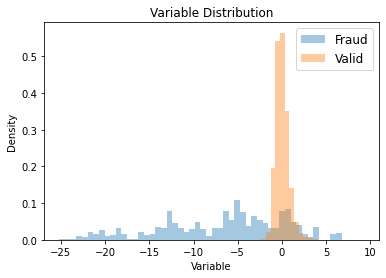

In [5]:
df_0 = df[ df['Class']==0 ]
df_1 = df[ df['Class']==1 ]

sns.distplot(df_1['V17'],  kde=False, label='Fraud', norm_hist=True, bins=50)
sns.distplot(df_0['V17'],  kde=False, label='Valid', norm_hist=True, bins=50)

plt.legend(prop={'size': 12})
plt.title('Variable Distribution')
plt.xlabel('Variable')
plt.ylabel('Density')

La variable V17 tiene información sobre el problema de clasificación que quiero resolver, debajo de -2.5 todo es fraude.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

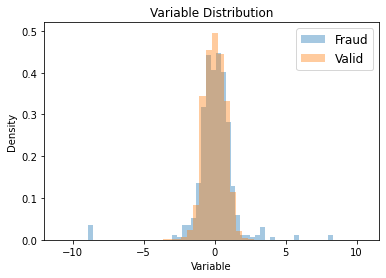

In [10]:
df_0 = df[ df['Class']==0 ]
df_1 = df[ df['Class']==1 ]

sns.distplot(df_1['V22'],  kde=False, label='Fraud', norm_hist=True, bins=50)
sns.distplot(df_0['V22'],  kde=False, label='Valid', norm_hist=True, bins=50)

plt.legend(prop={'size': 12})
plt.title('Variable Distribution')
plt.xlabel('Variable')
plt.ylabel('Density')

Esta variable no nos va a ofrecer información sobre el fraude, ya que ambas se comportan de la misma manera, si todas las vbles se comportan así, resolver el problema del fraude será dificil, debido a que hay un solapamiento completo.

Text(0, 0.5, 'Density')

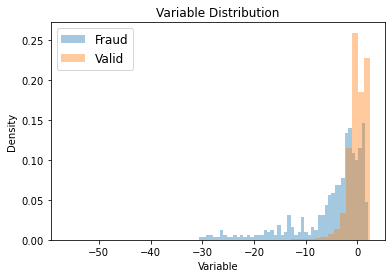

In [11]:
df_0 = df[ df['Class']==0 ]
df_1 = df[ df['Class']==1 ]

sns.distplot(df_1['V1'],  kde=False, label='Fraud', norm_hist=True, bins=50)
sns.distplot(df_0['V1'],  kde=False, label='Valid', norm_hist=True, bins=50)

plt.legend(prop={'size': 12})
plt.title('Variable Distribution')
plt.xlabel('Variable')
plt.ylabel('Density')

In [13]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [19]:
i = 1 
print('V{}'.format(i))

V1


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


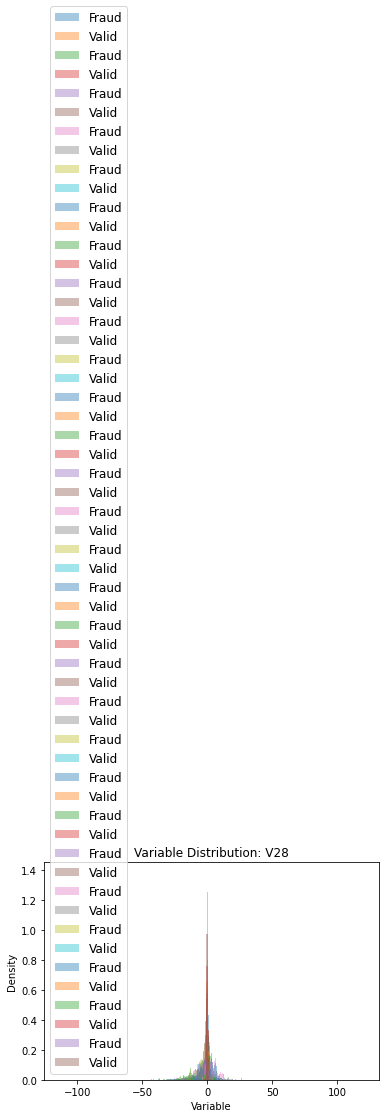

In [20]:
# Todos a la vez 

df_0 = df[ df['Class']==0 ]
df_1 = df[ df['Class']==1 ]
for i in range(1,29):
    sns.distplot(df_1['V{}'.format(i)],  kde=False, label='Fraud', norm_hist=True, bins=50)
    sns.distplot(df_0['V{}'.format(i)],  kde=False, label='Valid', norm_hist=True, bins=50)

    plt.legend(prop={'size': 12})
    plt.title('Variable Distribution: V{}'.format(i))
    plt.xlabel('Variable')
    plt.ylabel('Density')

Tiene sentido esto con la correlación, y hay una zona donde ya no se solapan, no separa tan bien como la V17 pero si mejor que la V22.

<AxesSubplot:xlabel='V25', ylabel='V15'>

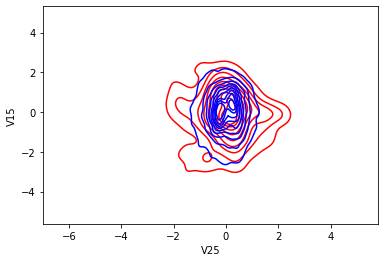

In [6]:
sns.kdeplot(data=df_1, x="V25", y="V15", color="red")
sns.kdeplot(data=df_0.sample(frac=0.1), x="V25", y="V15", color="blue") 

Usando seaborn, estmamos con kernels las densidades, subsampling de la clase válida, me quedo con un 10% de los datos, asumo que este 10% es estadísticamente significativo del resto. Muestro las curvas de nivel de las densidades de las variables V25 y V15.
Clases completamente solapadas, la correlación ya me indicaba esto.

<AxesSubplot:xlabel='V17', ylabel='V14'>

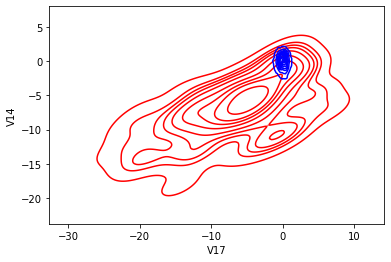

In [12]:
sns.kdeplot(data=df_1, x="V17", y="V14", color="red")
sns.kdeplot(data=df_0.sample(frac=0.1), x="V17", y="V14", color="blue") 

Con estas variables es factible detectar el fraude, hay probabilidades de que esto funcione. Tambien hay un solapamiento entre clases, esto indica que la prob de error no será 0, me equivocaré a la hora de clasificar, las curvas azules estan dentro de las curvas de nivel rojas.

# 2. Selección de atributos
1. Seleccionamos los atributos (características) a ser utilizadas. Dentro de los atributos $X$ no debe estar la clase $Class$.
2. Verificamos la cantidad de muestras de cada clase.

In [7]:
# 1
# Extract features and labels

#
# Obs. Modify the following code to select set of features
#
# The following line allows to select some variables to be used
X = df.loc[:,['V17','V14','V12','Amount']]

# Class is the target to predict (classify)
y = df.Class

# 2
# Number of samples per class
unique, counts = np.unique(y, return_counts=True)
for i in range(0,len(unique)):
  print('Class %i: Samples %i' % (unique[i], counts[i]) )

# Number of attributes
print('Number of attributes: %i' % (X.shape)[1])

Class 0: Samples 284315
Class 1: Samples 492
Number of attributes: 4


# 3. Entrenamiento del clasificador

1. El conjunto de datos se separa en entrenamiento y test.
2. Se selecciona y entrena un clasificador.
3. Métricas de performance



In [8]:
# Classifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# 1
# Split train and test 
# stratify=y means the same % of classes is present in train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0, stratify=y)

# 2
#
# Selection of classifier
#
#clf = KNeighborsClassifier(n_neighbors=3)
#clf = DecisionTreeClassifier()
#clf = LogisticRegression(solver='lbfgs',max_iter=500)
clf = GaussianNB()

# Train classifier
clf.fit(X_train,y_train)

# Opcional: Sirve para visualizar las probabilidades a 
# Priors GuassianNB
#print( clf.class_prior_ )

# Opcional: Visualización de los coeficientes de regresión logística.
# Coefs Logistic Regression
# print( clf.coef_ )

GaussianNB()

# 4. Evaluación

In [9]:
# 3
# Confusion matrix
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print(' Confusion matrix ------------------')
print(cm)

sum_diag = sum(cm[i][i] for i in range(2))
sum_all = sum(sum(cm))

print('\n % Corr ----------------------------')
print( sum_diag/sum_all*100 )

# Classification report
from sklearn.metrics import classification_report
target_names = ['1', '0']

print('\n Classification report ------------------')
report = classification_report(y_test, y_pred, target_names=target_names,output_dict=True)
print('Class 0 (Fraud) %s: ' % report['0'])
print('Class 1 (Valid) %s: ' % report['1'])

# Amount of fraud detected
a = X_test.Amount
# TP 
ind = (y_pred == 1) & (y_test == 1)
# Amount for TP
amount_detected = np.sum( a[ ind ] ) 
# Total amount of fraud
ind = (y_test == 1)
amount_total = np.sum( a[ ind ] ) 

print('\n Amount ------------------ \n Detected = %f, Total = %f, Percentage = %f' % (amount_detected, amount_total, (amount_detected/amount_total)*100))

 Confusion matrix ------------------
[[141156   1002]
 [    41    205]]

 % Corr ----------------------------
99.26757675346198

 Classification report ------------------
Class 0 (Fraud) {'precision': 0.16984258492129245, 'recall': 0.8333333333333334, 'f1-score': 0.28217481073640743, 'support': 246}: 
Class 1 (Valid) {'precision': 0.9997096255586166, 'recall': 0.9929515046638248, 'f1-score': 0.996319105009617, 'support': 142158}: 

 Amount ------------------ 
 Detected = 21867.450000, Total = 30229.360000, Percentage = 72.338448


##### Gaussian NB
###### Amount ------------------ 
###### Detected = 21867.450000, Total = 30229.360000, Percentage = 72.338448
Detecto un 72% del monto defraudado, que asciende haasta los 21867.45 dólares.
# FP: 1002 me va a alartar muchas veces, esto también es peligroso, buscaar el balance entre el fraude que quiero detectar y las alertar que voy a poder tratar.

# Ejercicio

El objetivo del ejercicio es comparar diferentes clasificadores para el problema de detección de fraude. 

Para cada clasificador se deberán evaluar los indicadores: FN, FP, precision, recall, % de monto de fraude detectado. Se sugiere visualizar las matrices de confusión para poder evaluar los diferentes clasificadores en conjunto con los demás indicadores mencionados antes.

## Clasificadores
1. Vecinos más cercanos
2. Decision Trees
3. Naive Bayes




